In [47]:
%run modules.py

<Figure size 432x288 with 0 Axes>

In [48]:
seq = build_mlp([2, 4, 6, 8])
data = np.ones(shape=(100, 2))
output = seq.forward(data)
grad_data = seq.backward(data, np.ones_like(output))

print("NN:")
print(seq, end="\n\n")
print(f"data.shape = {data.shape}")
print(f"output.shape = {output.shape}")
print(f"grad_data.shape = {grad_data.shape}")

NN:
Linear 2 -> 4
ReLU
Linear 4 -> 6
ReLU
Linear 6 -> 8

data.shape = (100, 2)
output.shape = (100, 8)
grad_data.shape = (100, 2)


In [49]:
print("NN inside:")
for i, (module, grads_list, params_list) in enumerate(zip(seq.modules, seq.get_parameters(), seq.get_grad_parameters())):
    print(f"{i}. {module}", end=", ")
    print("params", end = " = ")
    for param in params_list:
        print(param.shape, end=", ")
    print("grads", end = " = ")
    for grads in grads_list:
        print(grads.shape, end=", ")
    print()

NN inside:
0. Linear 2 -> 4, params = (4, 2), (4,), grads = (4, 2), (4,), 
1. ReLU, params = grads = 
2. Linear 4 -> 6, params = (6, 4), (6,), grads = (6, 4), (6,), 
3. ReLU, params = grads = 
4. Linear 6 -> 8, params = (8, 6), (8,), grads = (8, 6), (8,), 


In [50]:
%matplotlib inline
from time import time, sleep
import numpy as np
import matplotlib.pyplot as plt
from IPython import display

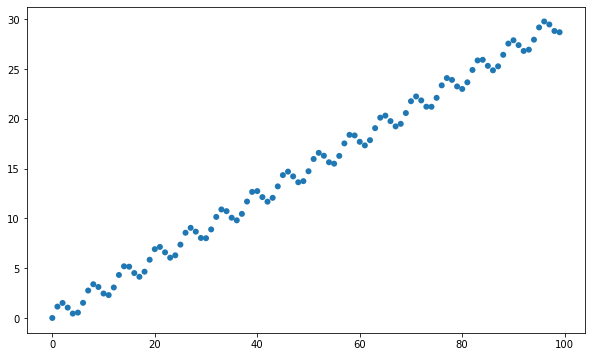

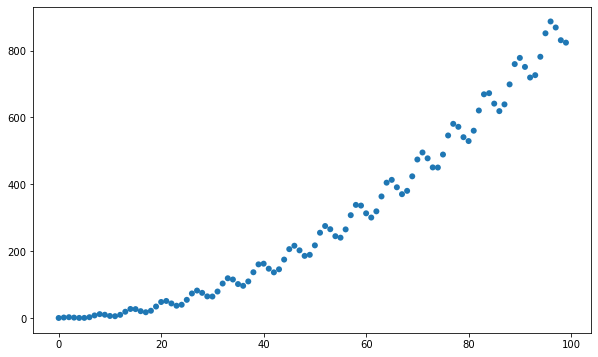

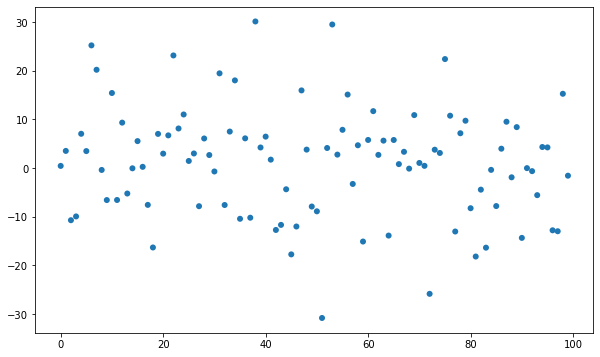

In [69]:
N = 100

X = np.arange(N)

Y = 0.3 * X + np.sin(X)
Y2 = Y * Y
Y3 = np.random.normal(0, 10, size=N)

plt.figure(figsize=(10, 6))
plt.scatter(X, Y, edgecolors= 'none')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(X, Y2, edgecolors= 'none')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(X, Y3, edgecolors= 'none')
plt.show()


In [52]:
def get_batches(dataset, batch_size):
    X, Y = dataset
    n_samples = X.shape[0]

    indices = np.arange(n_samples)
    np.random.shuffle(indices)
    
    for start in range(0, n_samples, batch_size):
        end = min(start + batch_size, n_samples)
        
        batch_idx = indices[start:end]
    
        yield X[batch_idx], Y[batch_idx]

In [53]:
def train(net, criterion, X, Y, optimizer_config, n_epoch, batch_size):

    loss_history = []

    for i in range(n_epoch):
        for x_batch, y_batch in get_batches((X, Y), batch_size):

            net.zero_grad_parameters()

            predictions = net.forward(x_batch)
            loss = criterion.forward(predictions, y_batch)
            dp = criterion.backward(predictions, y_batch)
            net.backward(x_batch, dp)

            sgd(net.get_parameters(), 
                net.get_grad_parameters(), 
                optimizer_config
            )      

            loss_history.append(loss)

        display.clear_output(wait=True)
        plt.figure(figsize=(8, 6))

        plt.title("Training loss")
        plt.xlabel("#iteration")
        plt.ylabel("loss")
        plt.plot(loss_history, 'b')
        plt.show()

        print('Current loss: %f' % loss)

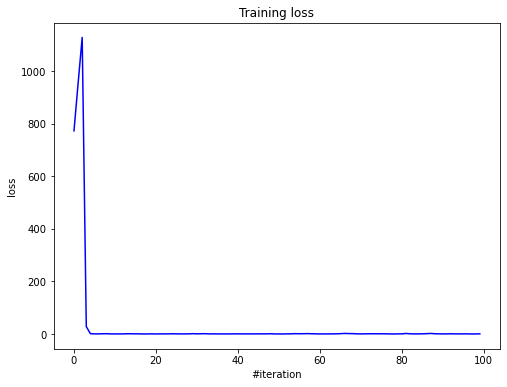

Current loss: 0.769259


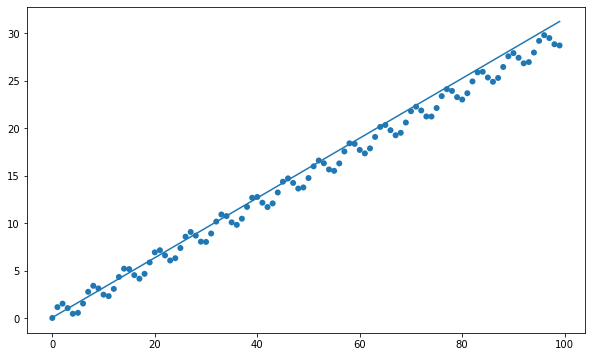

In [70]:
net = build_mlp([1, 1])
train(net, MSECriterion(), X[:int(N/2), None], Y[:int(N/2), None], {'learning_rate': 0.001}, 20, 10)

plt.figure(figsize=(10, 6))
plt.scatter(X, Y, edgecolors= 'none')
plt.plot(X, net.forward(X[:, None]))
plt.show()

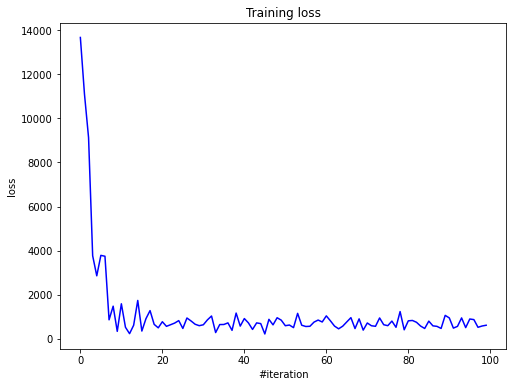

Current loss: 617.512739


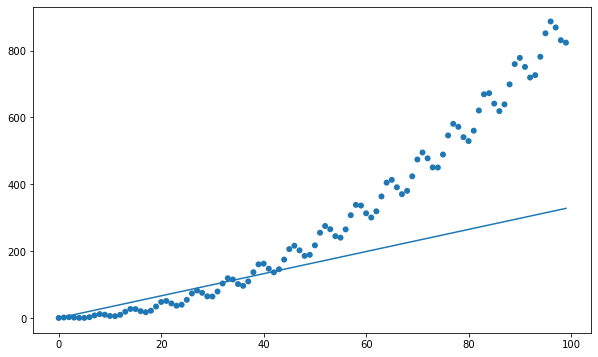

In [76]:
net = build_mlp([1, 1])
train(net, MSECriterion(), X[:int(N/2), None], Y2[:int(N/2), None], {'learning_rate': 0.0001}, 20, 10)
plt.figure(figsize=(10, 6))
plt.scatter(X, Y2, edgecolors= 'none')
plt.plot(X, net.forward(X[:, None]))
plt.show()

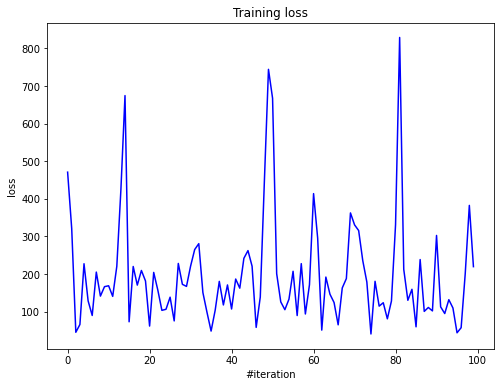

Current loss: 219.489005


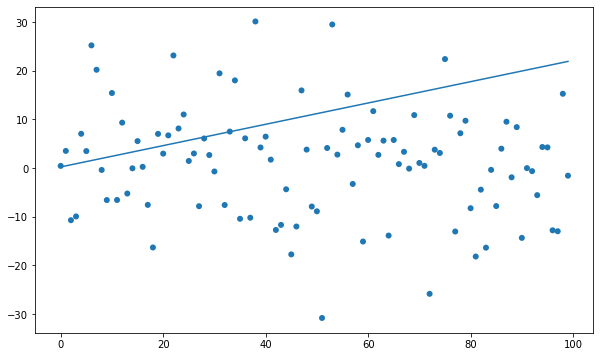

In [77]:
net = build_mlp([1, 1])
train(net, MSECriterion(), X[:int(N/2), None], Y3[:int(N/2), None], {'learning_rate': 0.001}, 20, 10)
plt.figure(figsize=(10, 6))
plt.scatter(X, Y3, edgecolors= 'none')
plt.plot(X, net.forward(X[:, None]))
plt.show()

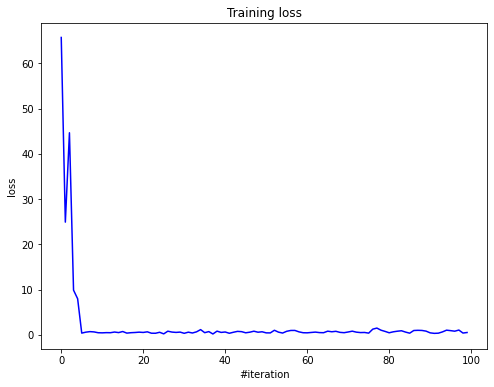

Current loss: 0.524294
Linear 1 -> 4
ReLU
Linear 4 -> 10
ReLU
Linear 10 -> 1


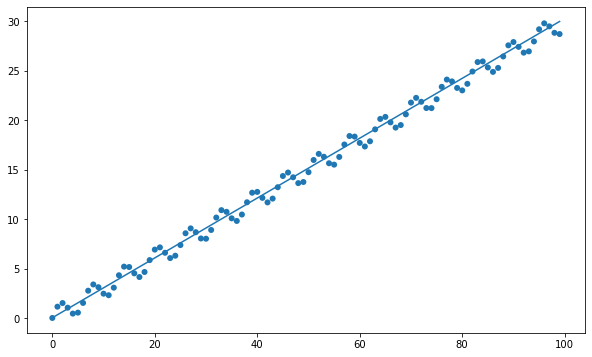

In [78]:
net = build_mlp([1, 4, 10, 1])
train(net, MSECriterion(), X[:int(N/2), None], Y[:int(N/2), None], {'learning_rate': 0.001}, 20, 10)

print(net)
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, edgecolors= 'none')
plt.plot(X, net.forward(X[:, None]))
plt.show()

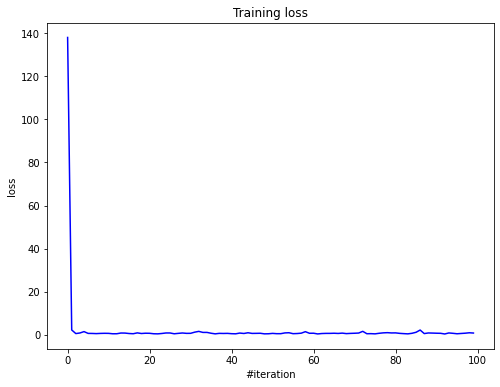

Current loss: 0.723430
Linear 1 -> 4
ReLU
Linear 4 -> 10
ReLU
Linear 10 -> 100
ReLU
Linear 100 -> 1


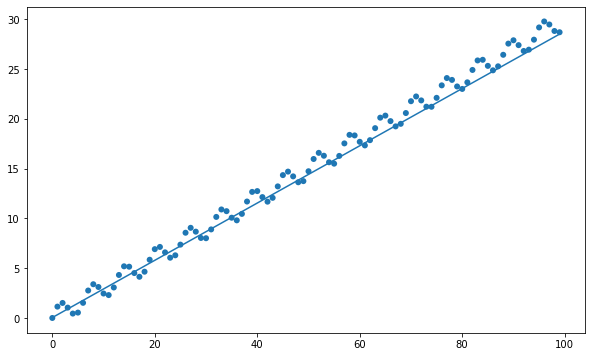

In [79]:
net = build_mlp([1, 4, 10, 100, 1])
train(net, MSECriterion(), X[:int(N/2), None], Y[:int(N/2), None], {'learning_rate': 0.001}, 20, 10)

print(net)
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, edgecolors= 'none')
plt.plot(X, net.forward(X[:, None]))
plt.show()

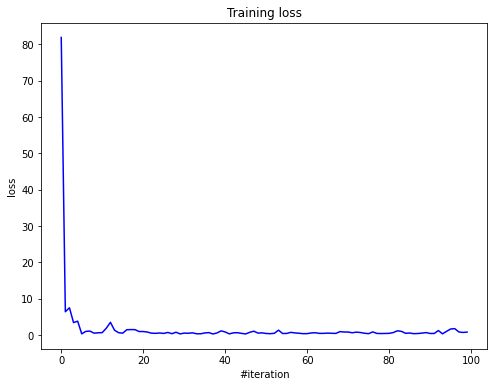

Current loss: 0.846628
Linear 1 -> 4
ReLU
Linear 4 -> 10
ReLU
Linear 10 -> 100
ReLU
Linear 100 -> 1000
ReLU
Linear 1000 -> 1


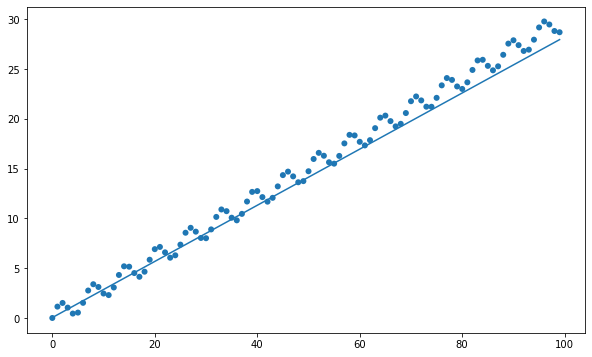

In [81]:
net = build_mlp([1, 4, 10, 100, 1000, 1])
train(net, MSECriterion(), X[:int(N/2), None], Y[:int(N/2), None], {'learning_rate': 0.001}, 20, 10)

print(net)
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, edgecolors= 'none')
plt.plot(X, net.forward(X[:, None]))
plt.show()